
## 🇬🇧 Data Science with Python 3.10. Learning rate

### 1. Import bibliotek
#### 🇬🇧 Import libraries 

In [1]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset_x4')
path = Path('/content/drive/My Drive/dataset_x4')

Mounted at /content/drive



#### 🇬🇧 Model training
We will now use the code from previous classes to train a model for performing simple classification into one of two classes. This time, we will use the ori_ppmi dataset, which contains images of people playing selected instruments. We will distinguish between people playing the guitar and people playing the violin.

In [3]:
classes = ['class_1', 'class_2']

In [4]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [5]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

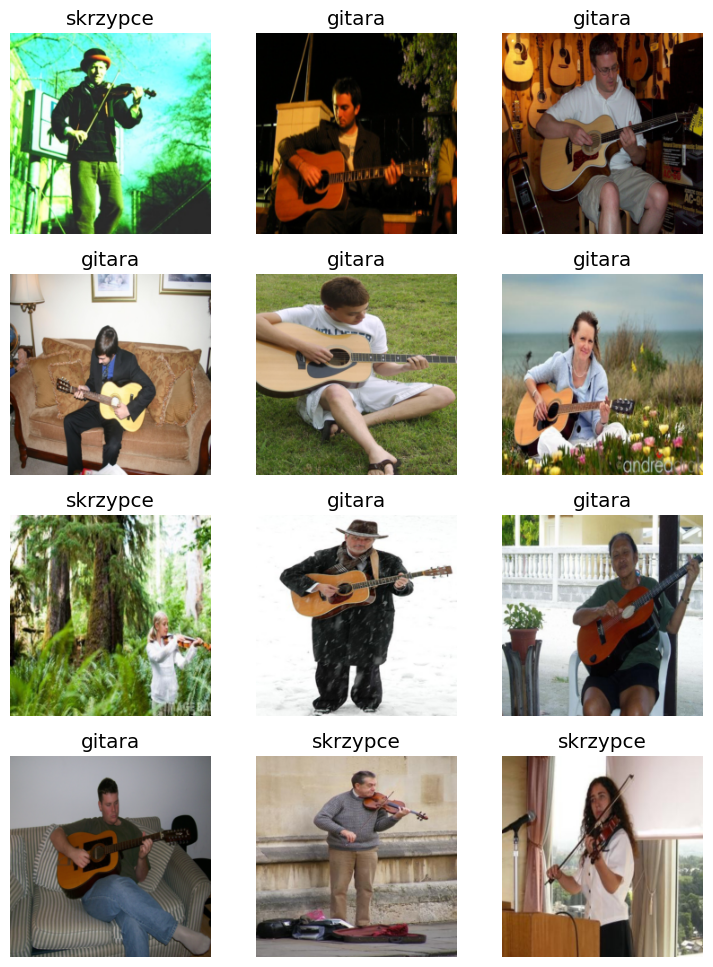

In [6]:
dls.valid.show_batch(max_n=12, nrows=4)

In [8]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.693620,1.273833,0.711864,0.711864,00:49


In [7]:
learn = vision_learner(dls, resnet152, metrics=[accuracy, F1Score()])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:05<00:00, 45.8MB/s]



#### 🇬🇧 Learning rate and early stopping in fastai

Last time, we used the fastai library for this purpose, and now we will use it again, but explore some additional functions of this library. One of them is checking the optimal range for the learning rate (learn.lr_find) and generating an appropriate plot (learn.recorder.plot). So, what exactly is the learning rate? As we know, neural networks learn by adjusting the connection weights between neurons. If the network is "heading in the right direction" (meaning the weights are being updated correctly), the error decreases. The learning rate is a value that determines to what extent we want to modify the weights of our network. If this value is too large, the network will update its weights too dynamically, and the learning process will be unstable. If the value is too small, the network will learn too slowly. You can find more information about implementing the learning rate in the fastai library here: https://docs.fast.ai/tutorial.vision.html

SuggestedLRs(valley=0.0010000000474974513)

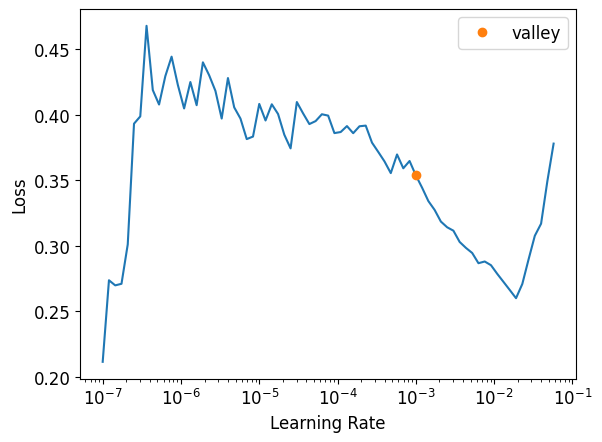

In [9]:
learn.lr_find()

In [10]:
learn.fit(1, 5e-3)
# //here a value 3 is there cuse in learning rat as you can it's some where near 10^-3 so
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.531545,1.756009,0.796610,0.777778,00:13


Path('models/stage-2.pth')

In [ ]:
# learn.fit(2)
# learn.save('stage-1')
# learn.lr_find()
# learn.fit(5, 5e-2)
# learn.save('stage-2')


### 🇬🇧 Task
##### 1. Perform neural network training using early stopping (10 epochs, patience = 5), save the model as "stage-1", generate a confusion matrix, and calculate the F1 score.
##### 2. Perform neural network training using early stopping (10 epochs, patience = 5), save the model as "stage-2", generate a confusion matrix, and calculate the F1 score, but this time, use the optimal learning rate.
##### 3. Compare the obtained results. Which model is better?
Note: Implementing early stopping in fastai is straightforward. Just add a new variable called cbs to the code related to model training, alongside the number of epochs and the optimal learning rate. This variable should include EarlyStoppingCallback and SaveModelCallback.

In [12]:
# task1
learn.fit_one_cycle(10, cbs = [EarlyStoppingCallback(monitor = "valid_loss",patience = 5),
                                  EarlyStoppingCallback(monitor = "valid_loss")])

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.385671,0.434062,0.932203,0.913043,00:13
1,0.327012,0.141804,0.983051,0.976744,00:13
2,0.226759,0.083413,0.966102,0.954545,00:13
3,0.180243,0.116169,0.966102,0.954545,00:19


No improvement since epoch 2: early stopping


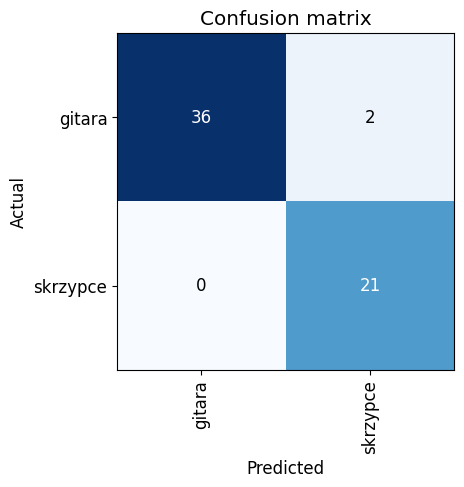

In [13]:
# 1b
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
learn.save('stage-1')

Path('models/stage-1.pth')

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.057373,0.122681,0.966102,0.954545,00:13
1,0.051579,0.122402,0.966102,0.954545,00:13
2,0.033589,0.128250,0.966102,0.954545,00:13


No improvement since epoch 1: early stopping


Path('models/stage-2.pth')

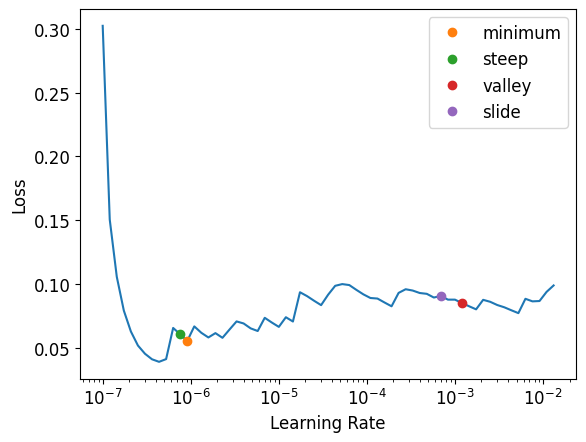

In [28]:
# task2

lrs = learn.lr_find(suggest_funcs=( minimum, steep, valley, slide))
learn.fit_one_cycle(10, slice(lrs.minimum, lrs.slide), 
           cbs = [EarlyStoppingCallback(monitor = "valid_loss",patience = 5),
                  EarlyStoppingCallback(monitor = "valid_loss")])
learn.save('stage-2')



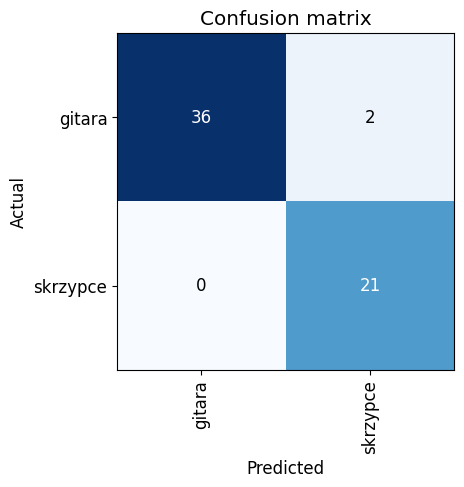

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# task 3
# after using optimal rate i was able to provide batter rate, reduce the error.